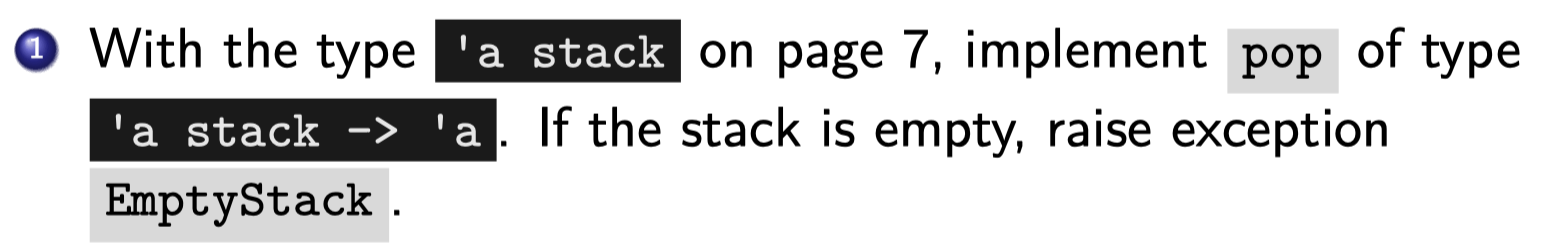

In [ ]:
(* 定义一个通用指针类型 *)
type 'a pointer = 'a option ref;;

(* 定义一个空指针异常 *)
exception Segfault;;

(* 分配内存并初始化一个指针 *)
let malloc x : 'a pointer = ref (Some x);;

(* 返回一个空指针 *)
let null () : 'a pointer = ref None;;

(* 解引用一个指针 *)
let deref x =
  match !x with 
  | None -> raise Segfault
  | Some r -> r;;

(* 赋值给一个指针 *)
let assign p v = p := Some v;;
type 'a nodeM = { value : 'a; next : 'a nodeM pointer };; 
type 'a stack = {top : 'a nodeM pointer};;

exception EmptyStack;;

let push (s:'a stack) v =
  match !(s.top) with
  | None -> s.top := Some {value = v; next = ref None} 
  | Some n -> 
    let new_node = {value = v; next = malloc n} in (* create a new node*)
    s.top :=  Some new_node;; (* update the top pointer*)

let pop (s:'a stack) =
  match !(s.top) with
  | None -> raise EmptyStack
  | Some n ->let v = n.value in
     s.top := !(n.next);
    v;;


type 'a pointer = 'a option ref


exception Segfault


val malloc : 'a -> 'a pointer = <fun>


val null : unit -> 'a pointer = <fun>


val deref : 'a option ref -> 'a = <fun>


val assign : 'a option ref -> 'a -> unit = <fun>


type 'a nodeM = { value : 'a; next : 'a nodeM pointer; }


type 'a stack = { top : 'a nodeM pointer; }


exception EmptyStack


val push : 'a stack -> 'a -> unit = <fun>


val pop : 'a stack -> 'a = <fun>


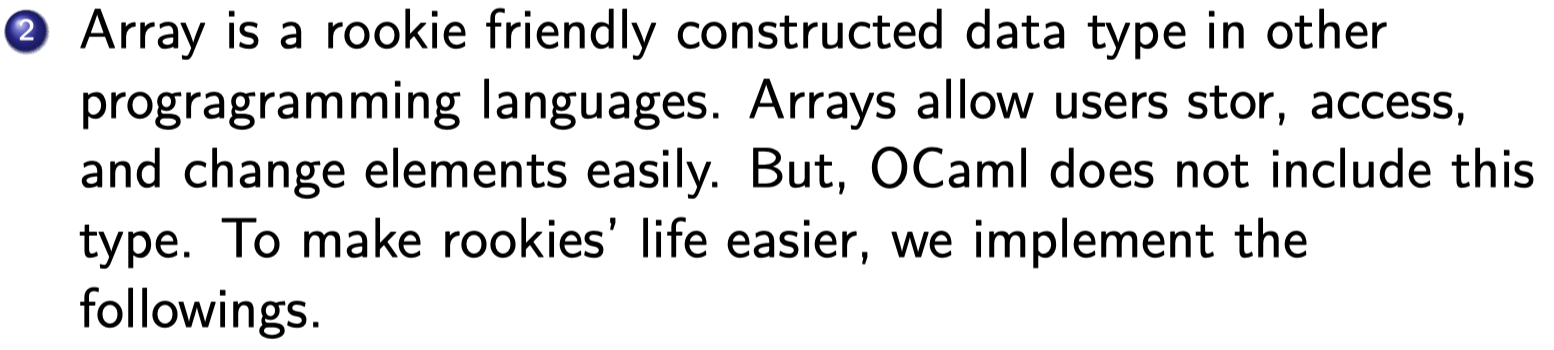

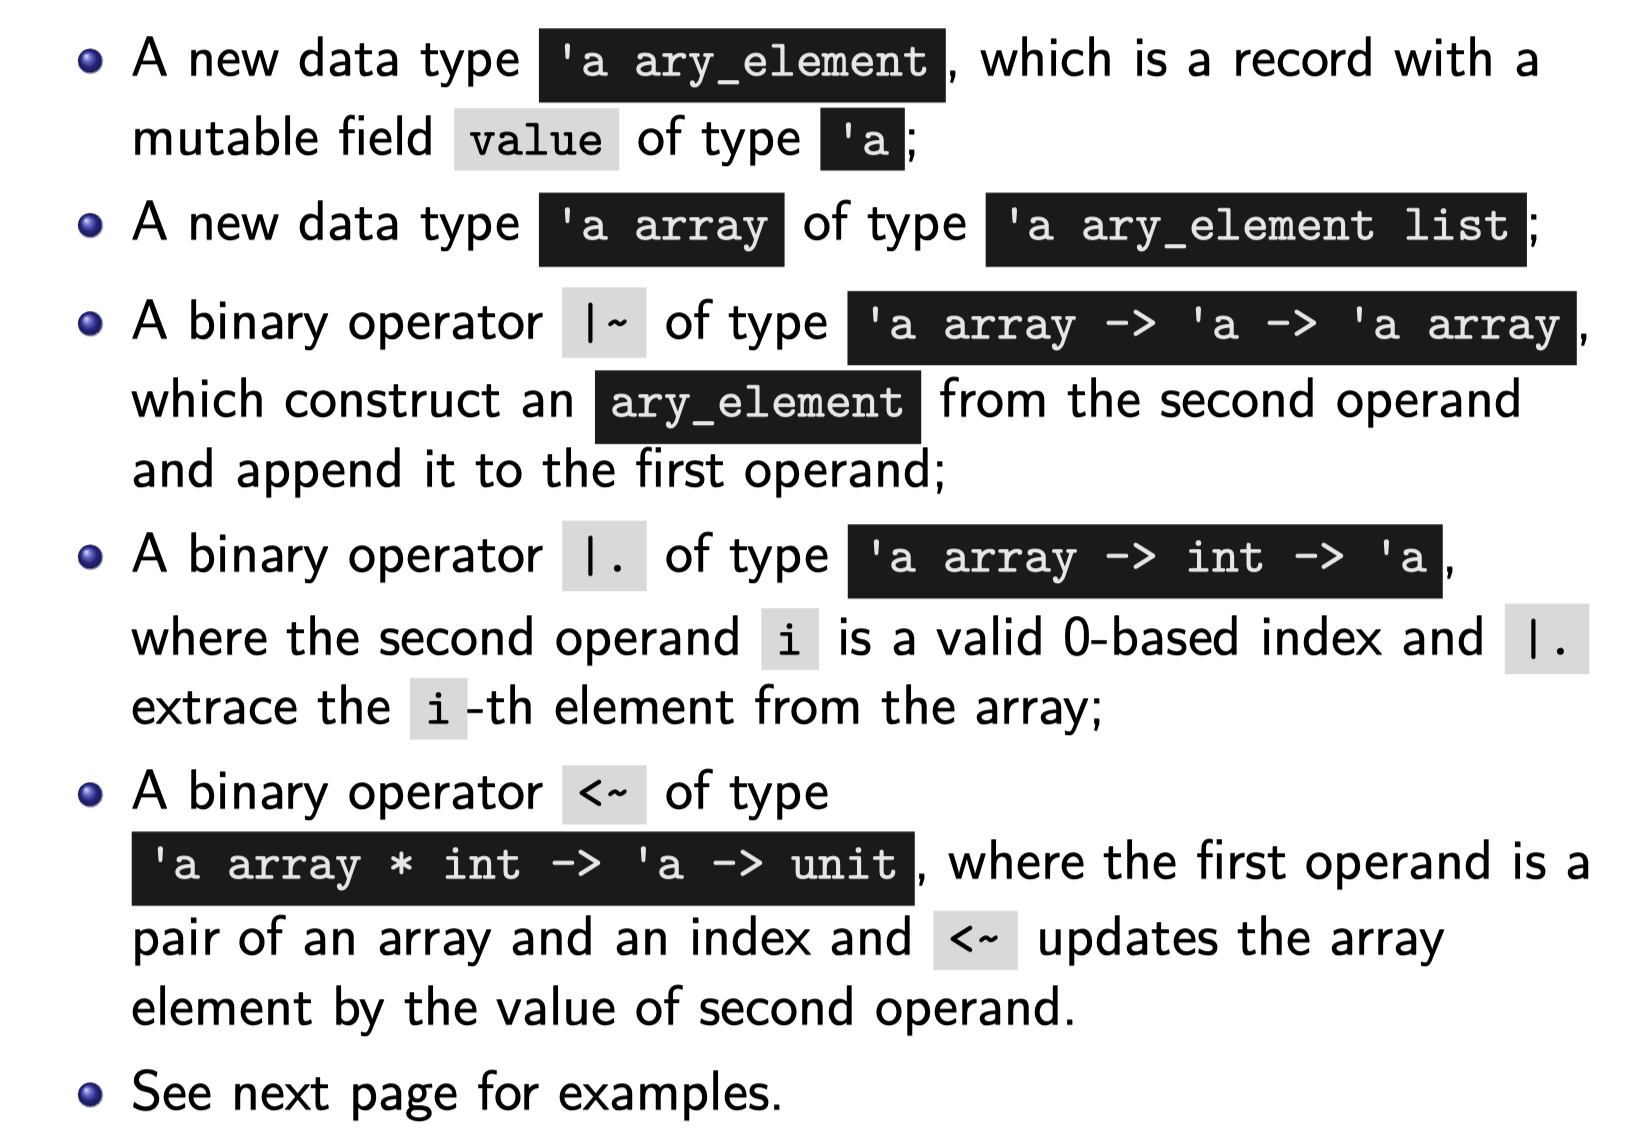

In [45]:
type 'a ary_element = { mutable value : 'a;};; 
type 'a array = 'a ary_element list;;

exception Negative_Index;;
exception Exceed_Length;;

let ( |~ ) (a:'a array) i = a @ [ {  value = i } ];;

  
let rec helpfun (a:'a array) i cnt=
    if i < 0 then raise Negative_Index
    else if cnt < i then 
      match a with
      | _::t -> helpfun t i (cnt + 1)
      | [] -> raise Exceed_Length
    else if cnt = i then
      match a with
      | h::_ -> h
      | [] -> raise Exceed_Length
    else raise Exceed_Length;;

let ( |. ) (a:'a array) i =
  let ele = helpfun a i 0 in
  ele.value;;


let a1 = [] |~ 2 |~ 4 ;;
let v1 = a1 |. 1;;

let ( <~ ) ((a: 'a array), (n: int)) (v: 'a) : unit =
  let ele = helpfun a n 0 in
  ele.value <- v;;

(a1,0) <~ -1;;


type 'a ary_element = { mutable value : 'a; }


type 'a array = 'a ary_element list


exception Negative_Index


exception Exceed_Length


val ( |~ ) : 'a array -> 'a -> 'a ary_element list = <fun>


val helpfun : 'a array -> int -> int -> 'a ary_element = <fun>


val ( |. ) : 'a array -> int -> 'a = <fun>


val a1 : int ary_element list = [{value = 2}; {value = 4}]


val v1 : int = 4


val ( <~ ) : 'a array * int -> 'a -> unit = <fun>


- : unit = ()
